In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Netflix TV Shows and Movies.csv")


print(df.head())

# Check for missing values and data types
print(df.info())


   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [30]:
# Handle missing values if any
df.dropna(inplace=True)

# Convert 'release_year' and 'imdb_votes' to appropriate data types
df['release_year'] = df['release_year'].astype(int)
df['imdb_votes'] = df['imdb_votes'].astype(int)


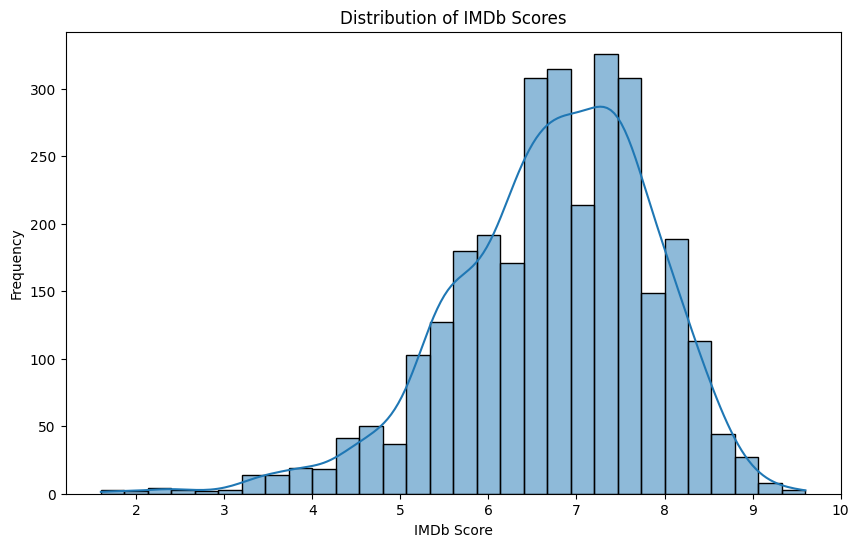

C:\Users\HP\AppData\Local\Temp\ipykernel_8000\2734614030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='imdb_score', data=df, errorbar=None, estimator='mean', palette='viridis')


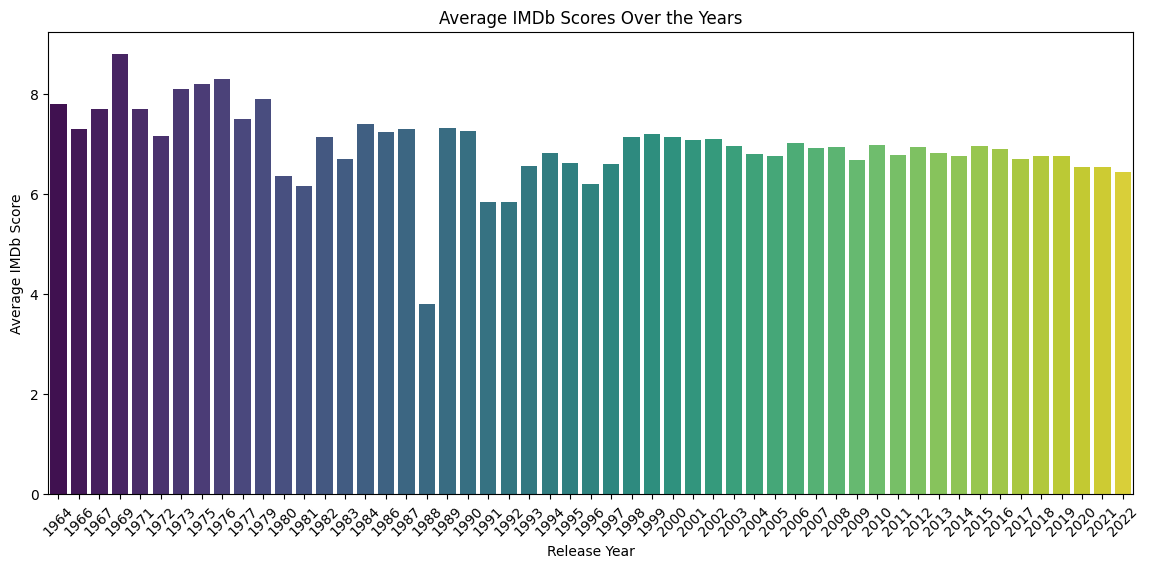

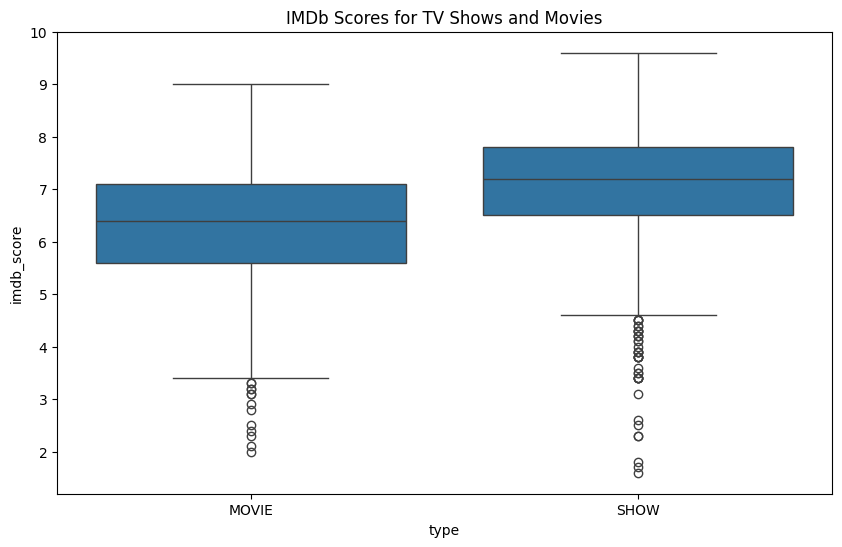

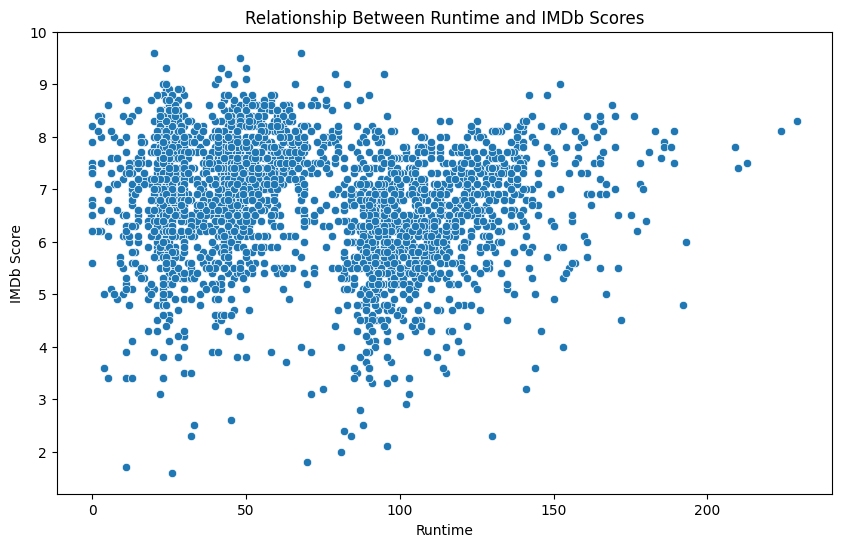

In [31]:
# Visualize the distribution of IMDb scores
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=30, kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x='release_year', y='imdb_score', data=df, errorbar=None, estimator='mean', palette='viridis')
plt.title('Average IMDb Scores Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()


# Explore IMDb scores by type (TV show or movie)
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='imdb_score', data=df)
plt.title('IMDb Scores for TV Shows and Movies')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='imdb_score', data=df)
plt.title('Relationship Between Runtime and IMDb Scores')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.show()


In [32]:
# Training model with Linear Regression
X = df[['imdb_votes', 'type']]
y = df['imdb_score']

X = pd.get_dummies(X, columns=['type'], drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
predictions = np.clip(model.predict(X_test), 1, 10)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.040263094196183


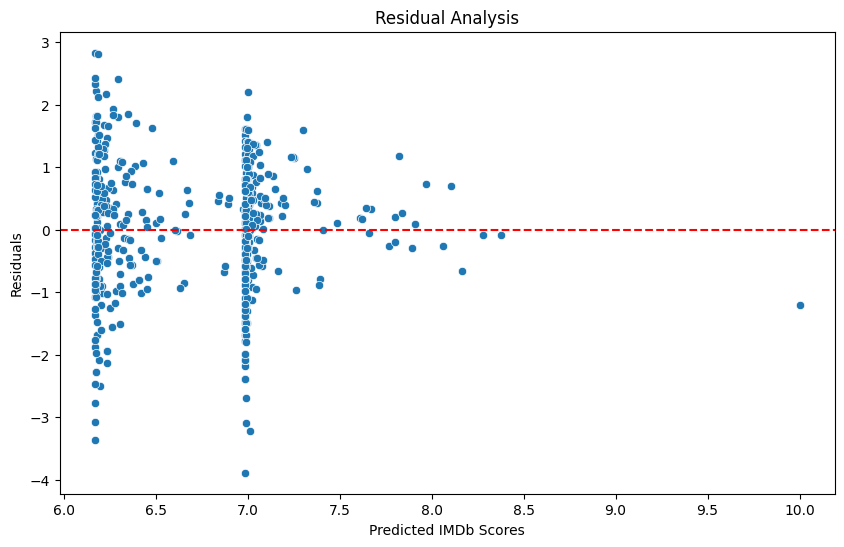

In [36]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted IMDb Scores')
plt.ylabel('Residuals')
plt.show()


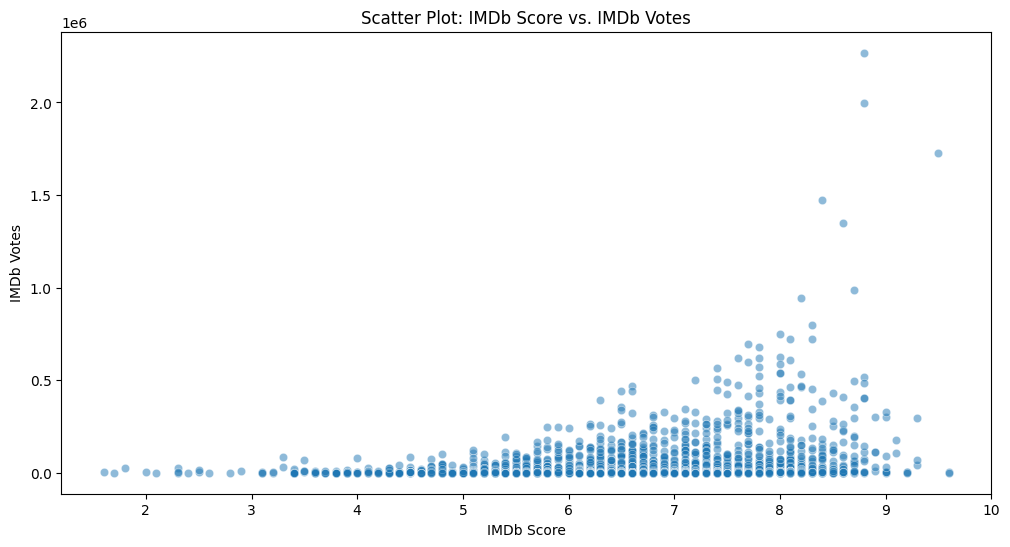

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='imdb_score', y='imdb_votes', data=df, alpha=0.5)
plt.title('Scatter Plot: IMDb Score vs. IMDb Votes')
plt.xlabel('IMDb Score')
plt.ylabel('IMDb Votes')
plt.show()

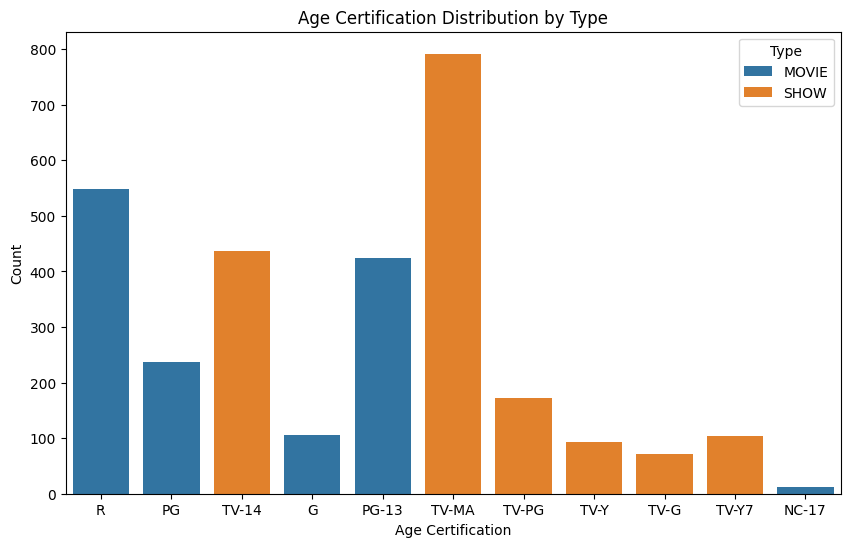

In [3]:
# Age certification distribution by type
plt.figure(figsize=(10, 6))
sns.countplot(x='age_certification', hue='type', data=df)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Age Certification Distribution by Type')
plt.legend(title='Type')
plt.show()

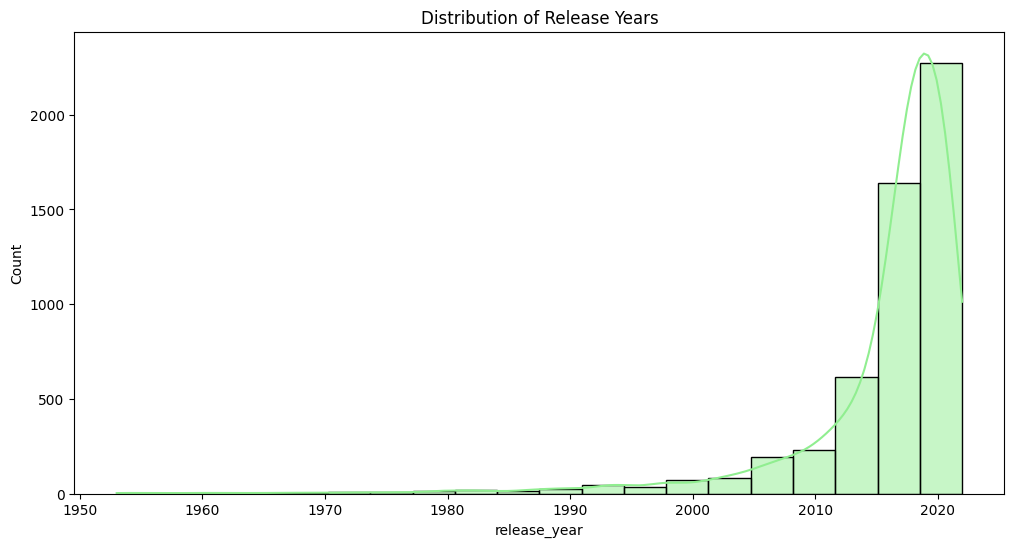

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', bins=20, kde=True, data=df, color='lightgreen', edgecolor='black')
plt.title('Distribution of Release Years')
plt.show()